# 1. Use the ScikitLearn machine learning library to implement

## (i) Linear Regression

In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Load the CSV data into a pandas DataFrame
data1 = pd.read_csv('/content/drive/MyDrive/DDO/LifeExpectancyData.csv')

In [3]:
data1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# --- Data Cleaning and Preprocessing ---


In [4]:
# Select features (independent variables) and target (dependent variable)
features = ['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
            'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
            'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
            ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
            ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
target = 'Life expectancy '

In [6]:
# Missing Value Analysis:
print("\nMissing values:\n", data1.isnull().sum())


Missing values:
 Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [7]:
# Drop rows where the target variable is missing
data1.dropna(subset=[target], inplace=True)

# Impute missing values in the remaining features using the mean strategy
imputer = SimpleImputer(strategy='mean')

# Select only numerical features for imputation
numerical_features = data1[features].select_dtypes(include=np.number).columns

# Apply imputation to numerical features only
data1[numerical_features] = imputer.fit_transform(data1[numerical_features])

# For categorical feature 'Status', use most frequent strategy:
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Use most_frequent for categorical

# Select the 'Status' column
categorical_features = ['Status']

# Apply imputation to the categorical feature 'Status'
data1[categorical_features] = categorical_imputer.fit_transform(data1[categorical_features])


In [8]:
print("\nMissing values after imputation:\n", data1.isnull().sum())


Missing values after imputation:
 Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [9]:
# Handle categorical variables using one-hot encoding
data1 = pd.get_dummies(data1, columns=['Status'], drop_first=True)

In [10]:
data1.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,Afghanistan,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,True
1,Afghanistan,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,True
2,Afghanistan,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,True
3,Afghanistan,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,True
4,Afghanistan,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,True


# --- Exploratory Data Analysis ---



In [11]:
# Descriptive Statistics:
print("Descriptive statistics:\n", data1.describe())


Descriptive statistics:
              Year  Life expectancy   Adult Mortality  infant deaths  \
count  2928.00000       2928.000000      2928.000000    2928.000000   
mean   2007.50000         69.224932       164.796448      30.407445   
std       4.61056          9.523867       124.292079     118.114450   
min    2000.00000         36.300000         1.000000       0.000000   
25%    2003.75000         63.100000        74.000000       0.000000   
50%    2007.50000         72.100000       144.000000       3.000000   
75%    2011.25000         75.700000       228.000000      22.000000   
max    2015.00000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2928.000000             2928.000000  2928.000000    2928.000000   
mean      4.614856              740.321185    80.960842    2427.855874   
std       3.914923             1990.930605    22.531361   11485.970937   
min       0.010000                0.000

The data spans from the year 2000 to 2015, with an average year of 2007.5. Life expectancy averages around 69.22 years, ranging from 36.3 to 89 years, while adult mortality rates average at 164.79 per 1,000, with significant variability. Infant deaths average at 30.41, with a maximum of 1800. Alcohol-related metrics average at 4.61, and percentage expenditure shows high variability with an average of 740.32. Hepatitis B and measles cases average at 80.96 and 2427.86, respectively, with measles reaching a maximum of 212,183 cases. The average BMI is 38.24, and under-five deaths average at 42.18. Polio cases average at 82.55, and total expenditure averages at 5.93. Diphtheria and HIV/AIDS incidences average at 82.32 and 1.75, respectively. GDP averages at 7494.21, with a wide range up to 119,172.74, and the average population is approximately 12.76 million. Thinness metrics for ages 1-19 and 5-9 years average at 4.85 and 4.88, respectively. The income composition of resources averages at 0.627, and schooling averages at 11.99 years.

In [12]:
# Calculate Correlation Matrix
numerical_data = data1.select_dtypes(include=np.number)
corr_matrix = numerical_data.corr()

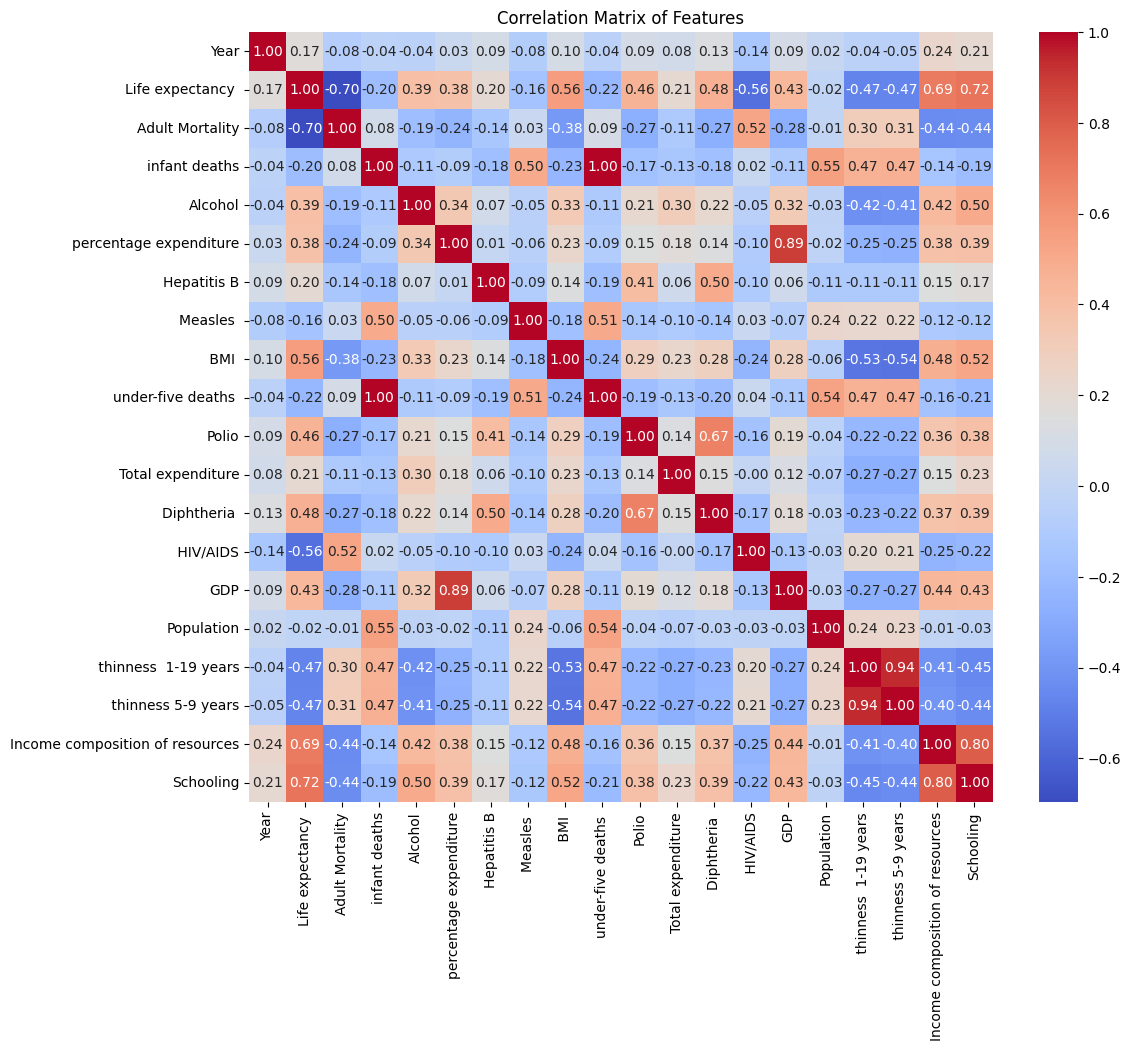

In [13]:
# Correlation Matrix
plt.figure(figsize=(12, 10))

# Select only numerical features for correlation analysis
numerical_data = data1.select_dtypes(include=np.number)
corr_matrix = numerical_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

The correlation plot shows that there is a strong positive correlation between life expectancy and factors such as GDP and schooling, suggesting that higher economic development and education levels are associated with longer life expectancy.

Conversely, infant and adult mortality rates exhibit a negative correlation with life expectancy and GDP, indicating that higher mortality rates are linked to lower economic development and life expectancy.

Additionally, health expenditure shows a moderate positive correlation with life expectancy and a negative correlation with infant deaths, implying that increased health spending is associated with better health outcomes.

In [14]:
# Analyze the correlation matrix for multicollinearity
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

print("\nHighly correlated feature pairs (correlation > 0.8):")
for pair in high_corr_pairs:
    print(f"Feature 1: {pair[0]}, Feature 2: {pair[1]}, Correlation: {pair[2]:.2f}")


Highly correlated feature pairs (correlation > 0.8):
Feature 1: under-five deaths , Feature 2: infant deaths, Correlation: 1.00
Feature 1: GDP, Feature 2: percentage expenditure, Correlation: 0.89
Feature 1:  thinness 5-9 years, Feature 2:  thinness  1-19 years, Correlation: 0.94
Feature 1: Schooling, Feature 2: Income composition of resources, Correlation: 0.80


In [15]:
# Remove highly correlated features
features_to_drop = ['under-five deaths', 'thinness 5-9 years', 'percentage expenditure', 'Schooling']  # features to drop

# Filter out any features that were already dropped during label encoding or target drop
features_to_drop = [f for f in features_to_drop if f in data1.columns]

data1.drop(features_to_drop, axis=1, inplace=True)
features = [f for f in features if f not in features_to_drop]

In [16]:
data1.columns

Index(['Country', 'Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources',
       'Status_Developing'],
      dtype='object')

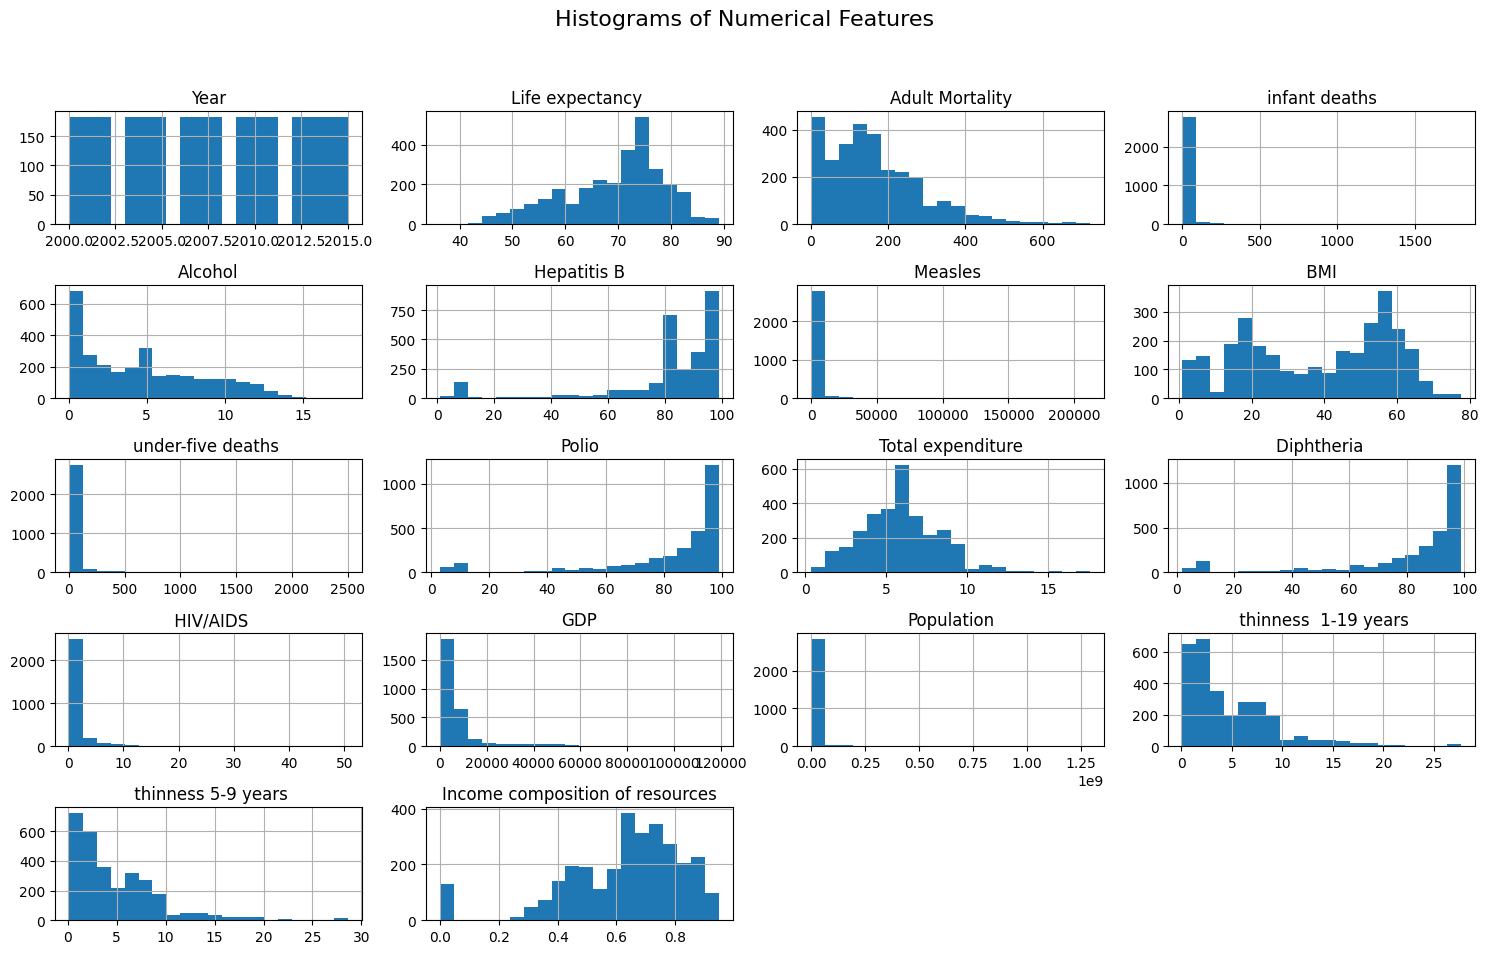

In [17]:
# Histograms of Numerical Features
data1.hist(figsize=(15, 10), bins=20)
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent title overlap
plt.show()

Adult mortality rates are generally low, with most data points concentrated at the lower end of the scale. Infant deaths are also predominantly low, with a sharp decline as the number increases. Alcohol-related metrics are mostly low, with a few higher outliers. Hepatitis B incidence shows variability, with peaks at both lower and higher ends. Measles cases are largely concentrated at very low values, with occasional outliers. BMI data is spread across the range, with notable peaks around 20-30 and 50-60. Under-five deaths are predominantly low, showing a sharp decline as values increase. Polio cases are mostly low, with a few higher values. Total expenditure is concentrated around lower values, peaking around 5-10. Diphtheria data shows most values are low, with a peak at the higher end. HIV/AIDS data is heavily skewed towards lower values. GDP distribution shows a concentration at lower values, with a long tail extending to higher figures. Population data points are mostly at the lower end, with a few very high values. Thinness metrics for ages 1-19 and 5-9 years both show most values at the lower end, gradually declining. The income composition of resources is spread across the range, peaking around 0.6-0.8.

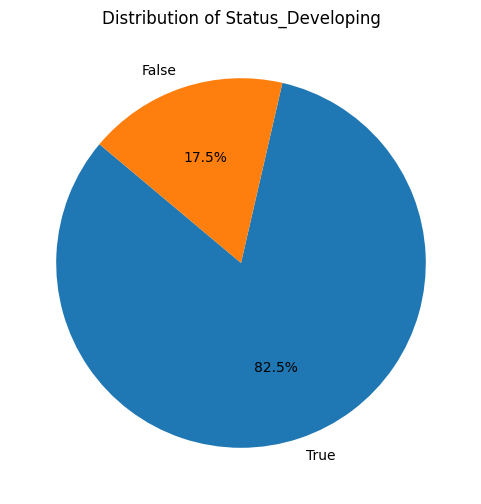

In [20]:
# Pie Chart of 'Status' Distribution
status_counts = data1['Status_Developing'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Status_Developing")
plt.show()

A significant majority, 82.5%, of the countries are classified as developed, indicating a higher level of economic development and income. In contrast, 17.5% are classified as developing, reflecting lower economic status. This distribution underscores the global disparity in economic development, with most countries achieving higher development status while a smaller portion remains in the developing category.

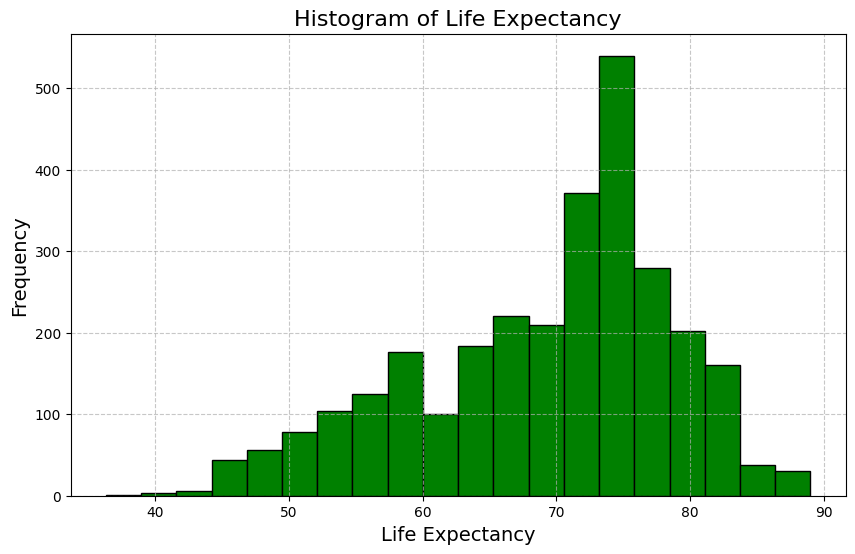

In [21]:
# Histogram of Life Expectancy
plt.figure(figsize=(10, 6))
plt.hist(data1['Life expectancy '], bins=20, edgecolor='black', color='green')
plt.title('Histogram of Life Expectancy', fontsize=16)
plt.xlabel('Life Expectancy', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

The majority of life expectancy values cluster between 60 and 80 years, with a prominent peak around 70-75 years, indicating that most observations fall within this range. There is a gradual decline in frequency as life expectancy increases beyond 80 years or decreases below 60 years. This distribution suggests that while most regions or populations have moderate to high life expectancies, there are fewer instances of extremely high or low life expectancies.

# Data Scaling

In [22]:
# Drop the "country" column and target variable from features
X = data1.drop(columns=["Country", target])

# Extract the target variable
y = data1[target]

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2342, 18)
(586, 18)
(2342,)
(586,)


# --- Model Training ---

In [24]:
# Linear Regression:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Ridge Regression:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Elastic Net:
elastic_net_model = ElasticNet()
elastic_net_model.fit(X_train, y_train)
y_pred_elastic = elastic_net_model.predict(X_test)


#  Model Evaluation ---

In [25]:
#### Evaluation Metrics: ####
def evaluate_model(y_true, y_pred, model_name="Model"):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name}:")
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    return mse, r2

In [26]:
# Cross-Validation

def cross_validate_model(model, X, y, cv=5):  # Changed cv to 5 for k-fold
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)  # Specify k-fold
    mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

    # Convert to positive MSE:
    mse_scores = -mse_scores
    print("\nCross-Validation Results:")
    print(f"Mean MSE: {np.mean(mse_scores):.4f}")
    print(f"Mean R-squared: {np.mean(r2_scores):.4f}")
    return np.mean(mse_scores), np.mean(r2_scores)

In [27]:
# Evaluate and Cross-Validate Linear Regression:
mse_linear, r2_linear = evaluate_model(y_test, y_pred_linear, "Linear Regression")
cross_validate_model(LinearRegression(), X, y)



Linear Regression:
Mean Squared Error: 17.271134576501836
R-squared: 0.8003323247012447

Cross-Validation Results:
Mean MSE: 18.0662
Mean R-squared: 0.7998


(18.066185870622974, 0.799762048957402)

The Linear Regression model explains about 80% of the variance in life expectancy with an R-squared of 0.80. The Mean Squared Error (MSE) is 17.27, indicating reasonable prediction accuracy.

Cross-validation results show similar performance, with a mean MSE of 18.07 and an R-squared of 0.80. Overall, the model performs well, generalizing effectively to new data.

In [28]:
# Evaluate and Cross-Validate Ridge Regression:
mse_ridge, r2_ridge = evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
cross_validate_model(Ridge(), X, y)  # added () to the function for correct function name



Ridge Regression:
Mean Squared Error: 17.28527684860237
R-squared: 0.8001688290964106

Cross-Validation Results:
Mean MSE: 18.0642
Mean R-squared: 0.7998


(18.06423584021452, 0.799784059680626)

The Ridge model performs similarly to Linear Regression an R-squared of 0.80, indicating it explains about 80% of the variance in life expectancy. The Mean Squared Error (MSE) is 17.29, showing a similar level of prediction accuracy as the Linear Regression model.

In [29]:
# Evaluate and Cross-Validate Elastic Net:
mse_elastic, r2_elastic = evaluate_model(y_test, y_pred_elastic, "Elastic Net")
cross_validate_model(ElasticNet(), X, y)


Elastic Net:
Mean Squared Error: 20.891277543518967
R-squared: 0.7584806717440102

Cross-Validation Results:
Mean MSE: 22.5819
Mean R-squared: 0.7500


(22.581945285917335, 0.7500180123164025)

The Elastic Net model has a slightly lower performance compared to both Linear and Ridge Regression, with an R-squared of 0.758, meaning it explains around 75.8% of the variance in life expectancy. The Mean Squared Error (MSE) is higher at 20.89, indicating somewhat less accurate predictions.

Cross-validation results show a mean MSE of 22.58 and an R-squared of 0.75, which also reflects slightly weaker performance relative to the other models

# --- Model Comparison & Interpretation --

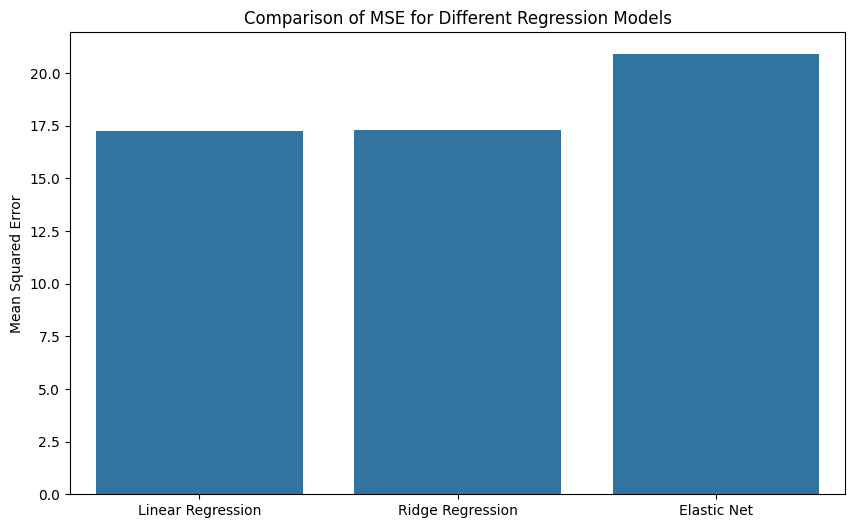

In [30]:
# Bar plot for MSE comparison:
model_names = ['Linear Regression', 'Ridge Regression', 'Elastic Net']
mse_values = [mse_linear, mse_ridge, mse_elastic]
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=mse_values)
plt.ylabel("Mean Squared Error")
plt.title("Comparison of MSE for Different Regression Models")
plt.show()

 Linear and Ridge Regression show similar performance with MSE values around 17, while Elastic Net performs notably worse with an MSE of approximately 20. The lower MSE values for Linear and Ridge Regression suggest they are more accurate models for this particular dataset.

In [33]:
# Adding an intercept column to X for statsmodels
X_with_intercept = sm.add_constant(X)

# Fit the OLS model (Ordinary Least Squares) for Linear Regression
ols_model = sm.OLS(y, X_with_intercept).fit()

# Print full statistical summary for Linear Regression
print("\n=== Linear Regression Summary ===")
print(ols_model.summary())

column_names = ['Year',
 'Status',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources'] # Replace with actual feature names

# Convert X to DataFrame with column names
X_df = pd.DataFrame(X, columns=column_names)

# Now your original code will work:
coef_df = pd.DataFrame({
    "Linear": linear_model.coef_,
    "Ridge": ridge_model.coef_,
    "Elastic Net": elastic_net_model.coef_
}, index=X_df.columns)

print(coef_df)

# Print intercepts separately
print("\n=== Intercepts ===")
print("Linear Regression Intercept:", linear_model.intercept_)
print("Ridge Regression Intercept:", ridge_model.intercept_)
print("Elastic Net Intercept:", elastic_net_model.intercept_)



=== Linear Regression Summary ===
                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     666.4
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:06:54   Log-Likelihood:                -8361.3
No. Observations:                2928   AIC:                         1.676e+04
Df Residuals:                    2909   BIC:                         1.687e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.

The Linear Regression model explains 80.5% of the variance in life expectancy (R² = 0.805), with several predictors significantly influencing the outcome. Variables like Adult Mortality, HIV/AIDS, and Income Composition of Resources have strong effects (p < 0.05), while others like GDP and thinness 5-9 years are less significant. The Durbin-Watson statistic (0.730) suggests potential autocorrelation in residuals. Comparing models, Ridge and Elastic Net shrink some coefficients, reducing overfitting, while maintaining key predictors like Status, Adult Mortality, and Diphtheria. The intercept remains consistent across models (~69.2), indicating stable baseline life expectancy.

# ---Model Tuning

In [38]:
# Ridge Regression alpha tuning
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Display the best alpha value
print("\nBest Ridge Alpha:", grid_search.best_params_)

# Get the best Ridge model
best_ridge = grid_search.best_estimator_

# Predict with the best Ridge model
y_pred_best_ridge = best_ridge.predict(X_test)

# Evaluate the best Ridge model
mse_best_ridge, r2_best_ridge = evaluate_model(y_test, y_pred_best_ridge, "Best Ridge Regression")

# Cross-validation for the best Ridge model
cross_validate_model(best_ridge, X, y)



Best Ridge Alpha: {'alpha': 1}

Best Ridge Regression:
Mean Squared Error: 17.28527684860237
R-squared: 0.8001688290964106

Cross-Validation Results:
Mean MSE: 18.0642
Mean R-squared: 0.7998


(18.06423584021452, 0.799784059680626)

The model found an optimal alpha value of 1 and achieved a Mean Squared Error of 17.29 with an R-squared value of 0.80 on the test set. Cross-validation results were similar, with a mean MSE of 18.06 and mean R-squared of 0.80, indicating consistent performance across different data splits and suggesting the model is robust without overfitting.

In [40]:
# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define parameter grid for ElasticNet
param_grid_elastic = {
    'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9]
}

# Grid Search with increased iterations
grid_search_elastic = GridSearchCV(
    ElasticNet(max_iter=5000),  # More iterations for convergence
    param_grid_elastic,
    scoring='neg_mean_squared_error',
    cv=5
)
grid_search_elastic.fit(X_train_scaled, y_train)

# Display best parameters
print("\nBest Elastic Net Parameters:", grid_search_elastic.best_params_)

# Get the best ElasticNet model
best_elastic = grid_search_elastic.best_estimator_

# Predict with the best ElasticNet model
y_pred_best_elastic = best_elastic.predict(X_test)

# Evaluate model
mse_best_elastic, r2_best_elastic = evaluate_model(y_test, y_pred_best_elastic, "Best Elastic Net")

# Cross-validation
cross_validate_model(best_elastic, X, y)



Best Elastic Net Parameters: {'alpha': 0.001, 'l1_ratio': 0.7}

Best Elastic Net:
Mean Squared Error: 17.284686392982216
R-squared: 0.8001756552201098

Cross-Validation Results:
Mean MSE: 18.0621
Mean R-squared: 0.7998


(18.06212773737324, 0.7998079366594005)

The Elastic Net model's optimal performance was achieved with hyperparameters of alpha=0.001 and l1_ratio=0.7. The model demonstrated strong predictive ability with an MSE of 17.28 and an R-squared value of 0.80 on the test set. The cross-validation results were consistent with these findings, showing a mean MSE of 18.06 and mean R-squared of 0.80, which indicates the model is stable and generalizes well to unseen data.

# 2. Deep Learning with CNN for Clothing Classification using Fashion-MNIST dataset.

In [ ]:
# Import necessary libraries for data processing, machine learning, and visualization
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from PIL import Image


In [ ]:
# Set device to GPU if available, otherwise fallback to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")  # Print the chosen device

Using device: cuda


In [ ]:
# Define custom dataset class to load FashionMNIST data from CSV file
class FashionMNISTDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        # Load data from CSV file
        self.data = pd.read_csv(csv_file)
        self.transform = transform
        # Reshape image data (28x28) and labels from the CSV
        self.images = self.data.iloc[:, 1:].values.reshape(-1, 28, 28).astype(np.uint8)
        self.labels = self.data.iloc[:, 0].values

    def __len__(self):
        # Return the total number of samples
        return len(self.data)

    def __getitem__(self, idx):
        # Retrieve the image and label for a given index
        image = self.images[idx]
        label = self.labels[idx]
        # Apply transformations (if any) on the image
        if self.transform:
            image = self.transform(image)
        return image, label


In [ ]:
# Define a simple CNN model
class SimpleLeNet(nn.Module):
    def __init__(self):
        super(SimpleLeNet, self).__init__()
        # First convolutional layer (input: 1 channel, output: 4 channels)
        self.conv1 = nn.Conv2d(1, 4, kernel_size=5)
        # Second convolutional layer (input: 4 channels, output: 8 channels)
        self.conv2 = nn.Conv2d(4, 8, kernel_size=5)
        # Fully connected layers (input size reduced for simplicity)
        self.fc1 = nn.Linear(8 * 4 * 4, 64)
        self.fc2 = nn.Linear(64, 10)  # 10 output classes

    def forward(self, x):
        # Forward pass through the model layers
        x = F.relu(self.conv1(x))  # ReLU activation after first convolution
        x = F.max_pool2d(x, kernel_size=2)  # Max pooling layer
        x = F.relu(self.conv2(x))  # ReLU activation after second convolution
        x = F.max_pool2d(x, kernel_size=2)  # Max pooling layer
        x = torch.flatten(x, 1)  # Flatten the tensor for the fully connected layers
        x = F.relu(self.fc1(x))  # ReLU activation after first fully connected layer
        x = self.fc2(x)  # Final output layer
        return x


In [ ]:
# Define different image augmentations for data augmentation
aug_transforms = [
    transforms.Compose([  # Horizontal flip
        transforms.ToPILImage(),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ]),
    transforms.Compose([  # Random rotation
        transforms.ToPILImage(),
        transforms.RandomRotation(degrees=15),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ]),
    transforms.Compose([  # Random affine transformation (translation only)
        transforms.ToPILImage(),
        transforms.RandomAffine(degrees=0, translate=(0.2, 0.2)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ]),
    transforms.Compose([  # Random resized crop
        transforms.ToPILImage(),
        transforms.RandomResizedCrop(28, scale=(0.8, 1.2), ratio=(0.75, 1.33)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ]),
    transforms.Compose([  # Color jitter (brightness and contrast adjustment)
        transforms.ToPILImage(),
        transforms.ColorJitter(brightness=0.5, contrast=0.5),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
]


In [ ]:
# List of learning rates to test during the experiments
learning_rates = [0.001, 0.0005, 0.0001, 0.005, 0.002]

In [ ]:
# Function to train the model on the training data
def train_model(model, train_loader, criterion, optimizer, epochs=15):
    model.train()  # Set model to training mode
    epoch_losses = []

    # Loop over epochs
    for epoch in range(epochs):
        running_loss = 0.0
        # Loop over batches in the training dataset
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            images, labels = images.to(device), labels.to(device)  # Move data to GPU

            optimizer.zero_grad()  # Zero out the gradients
            outputs = model(images)  # Perform forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backpropagate the gradients
            optimizer.step()  # Update model parameters
            running_loss += loss.item()  # Accumulate loss

        # Compute the average loss for the epoch
        epoch_loss = running_loss / len(train_loader)
        epoch_losses.append(epoch_loss)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

    return sum(epoch_losses) / len(epoch_losses)  # Return the average loss over all epochs


In [ ]:
# Function to evaluate the model on the test data
def evaluate_model(model, test_loader, criterion):
    model.eval()  # Set model to evaluation mode
    all_preds, all_labels = [], []  # To store predictions and true labels
    total_loss = 0.0

    with torch.no_grad():  # Disable gradient tracking for evaluation
        # Loop over batches in the test dataset
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to GPU

            outputs = model(images)  # Perform forward pass
            loss = criterion(outputs, labels)  # Compute loss
            total_loss += loss.item()  # Accumulate loss

            _, predicted = torch.max(outputs, 1)  # Get the predicted class
            all_preds.extend(predicted.cpu().numpy())  # Store predictions
            all_labels.extend(labels.cpu().numpy())  # Store true labels

    # Compute accuracy and average loss
    accuracy = accuracy_score(all_labels, all_preds) * 100
    avg_loss = total_loss / len(test_loader)

    return avg_loss, accuracy


In [ ]:
# Load the test dataset with appropriate transformations
test_dataset = FashionMNISTDataset('/content/drive/MyDrive/DDO/mnist_fashion_test.csv', transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
]))
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)  # DataLoader for test set


In [ ]:
# List to store results of all experiments
experiments = []

# Run experiments with no augmentation
for i, lr in enumerate(learning_rates):
    print(f"Starting No Augmentation Experiment {i+1} with learning rate {lr}")
    # Define the dataset and DataLoader for training
    train_dataset = FashionMNISTDataset('/content/drive/MyDrive/DDO/mnist_fashion_train.csv', transforms.Compose([
        transforms.ToPILImage(),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ]))
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    model = SimpleLeNet().to(device)  # Initialize and move model to GPU
    criterion = nn.CrossEntropyLoss()  # Define the loss function
    optimizer = optim.Adam(model.parameters(), lr=lr)  # Define the optimizer

    # Train and evaluate the model
    train_loss = train_model(model, train_loader, criterion, optimizer)
    test_loss, acc = evaluate_model(model, test_loader, criterion)
    experiments.append({'Experiment': f'No Aug {i+1}', 'Learning Rate': lr, 'Train Loss': train_loss, 'Test Loss': test_loss, 'Accuracy': acc})
    print(f"Finished No Augmentation Experiment {i+1}")

# Run experiments with augmentations (limit to 5)
for i, transform in enumerate(aug_transforms[:5]):
    print(f"Starting Augmentation Experiment {i+1}")
    train_dataset = FashionMNISTDataset('/content/drive/MyDrive/DDO/mnist_fashion_train.csv', transform)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    model = SimpleLeNet().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train and evaluate the model
    train_loss = train_model(model, train_loader, criterion, optimizer)
    test_loss, acc = evaluate_model(model, test_loader, criterion)
    experiments.append({'Experiment': f'Aug {i+1}', 'Transformation': str(transform), 'Train Loss': train_loss, 'Test Loss': test_loss, 'Accuracy': acc})
    print(f"Finished Augmentation Experiment {i+1}")


Starting No Augmentation Experiment 1 with learning rate 0.001


Epoch 1/15: 100%|██████████| 938/938 [00:19<00:00, 48.79it/s]


Epoch 1/15, Loss: 0.6804


Epoch 2/15: 100%|██████████| 938/938 [00:23<00:00, 40.78it/s]


Epoch 2/15, Loss: 0.4762


Epoch 3/15: 100%|██████████| 938/938 [00:17<00:00, 53.66it/s]


Epoch 3/15, Loss: 0.4235


Epoch 4/15: 100%|██████████| 938/938 [00:16<00:00, 55.27it/s]


Epoch 4/15, Loss: 0.3926


Epoch 5/15: 100%|██████████| 938/938 [00:17<00:00, 53.89it/s]


Epoch 5/15, Loss: 0.3708


Epoch 6/15: 100%|██████████| 938/938 [00:17<00:00, 53.34it/s]


Epoch 6/15, Loss: 0.3550


Epoch 7/15: 100%|██████████| 938/938 [00:16<00:00, 55.90it/s]


Epoch 7/15, Loss: 0.3412


Epoch 8/15: 100%|██████████| 938/938 [00:16<00:00, 55.69it/s]


Epoch 8/15, Loss: 0.3313


Epoch 9/15: 100%|██████████| 938/938 [00:17<00:00, 54.94it/s]


Epoch 9/15, Loss: 0.3229


Epoch 10/15: 100%|██████████| 938/938 [00:17<00:00, 52.35it/s]


Epoch 10/15, Loss: 0.3133


Epoch 11/15: 100%|██████████| 938/938 [00:23<00:00, 39.25it/s]


Epoch 11/15, Loss: 0.3072


Epoch 12/15: 100%|██████████| 938/938 [00:19<00:00, 48.33it/s]


Epoch 12/15, Loss: 0.3013


Epoch 13/15: 100%|██████████| 938/938 [00:16<00:00, 55.22it/s]


Epoch 13/15, Loss: 0.2956


Epoch 14/15: 100%|██████████| 938/938 [00:16<00:00, 56.18it/s]


Epoch 14/15, Loss: 0.2892


Epoch 15/15: 100%|██████████| 938/938 [00:17<00:00, 53.89it/s]


Epoch 15/15, Loss: 0.2852
Finished No Augmentation Experiment 1
Starting No Augmentation Experiment 2 with learning rate 0.0005


Epoch 1/15: 100%|██████████| 938/938 [00:19<00:00, 49.02it/s]


Epoch 1/15, Loss: 0.7640


Epoch 2/15: 100%|██████████| 938/938 [00:19<00:00, 48.89it/s]


Epoch 2/15, Loss: 0.5014


Epoch 3/15: 100%|██████████| 938/938 [00:18<00:00, 51.22it/s]


Epoch 3/15, Loss: 0.4497


Epoch 4/15: 100%|██████████| 938/938 [00:18<00:00, 51.11it/s]


Epoch 4/15, Loss: 0.4151


Epoch 5/15: 100%|██████████| 938/938 [00:19<00:00, 49.19it/s]


Epoch 5/15, Loss: 0.3932


Epoch 6/15: 100%|██████████| 938/938 [00:18<00:00, 50.59it/s]


Epoch 6/15, Loss: 0.3763


Epoch 7/15: 100%|██████████| 938/938 [00:16<00:00, 56.69it/s]


Epoch 7/15, Loss: 0.3638


Epoch 8/15: 100%|██████████| 938/938 [00:16<00:00, 55.88it/s]


Epoch 8/15, Loss: 0.3538


Epoch 9/15: 100%|██████████| 938/938 [00:17<00:00, 52.86it/s]


Epoch 9/15, Loss: 0.3456


Epoch 10/15: 100%|██████████| 938/938 [00:17<00:00, 54.59it/s]


Epoch 10/15, Loss: 0.3379


Epoch 11/15: 100%|██████████| 938/938 [00:16<00:00, 55.85it/s]


Epoch 11/15, Loss: 0.3298


Epoch 12/15: 100%|██████████| 938/938 [00:17<00:00, 55.03it/s]


Epoch 12/15, Loss: 0.3237


Epoch 13/15: 100%|██████████| 938/938 [00:17<00:00, 54.61it/s]


Epoch 13/15, Loss: 0.3175


Epoch 14/15: 100%|██████████| 938/938 [00:17<00:00, 52.96it/s]


Epoch 14/15, Loss: 0.3123


Epoch 15/15: 100%|██████████| 938/938 [00:16<00:00, 55.94it/s]


Epoch 15/15, Loss: 0.3073
Finished No Augmentation Experiment 2
Starting No Augmentation Experiment 3 with learning rate 0.0001


Epoch 1/15: 100%|██████████| 938/938 [00:19<00:00, 48.62it/s]


Epoch 1/15, Loss: 1.3231


Epoch 2/15: 100%|██████████| 938/938 [00:16<00:00, 55.99it/s]


Epoch 2/15, Loss: 0.7218


Epoch 3/15: 100%|██████████| 938/938 [00:16<00:00, 55.93it/s]


Epoch 3/15, Loss: 0.6419


Epoch 4/15: 100%|██████████| 938/938 [00:16<00:00, 56.26it/s]


Epoch 4/15, Loss: 0.5976


Epoch 5/15: 100%|██████████| 938/938 [00:18<00:00, 51.72it/s]


Epoch 5/15, Loss: 0.5673


Epoch 6/15: 100%|██████████| 938/938 [00:16<00:00, 55.68it/s]


Epoch 6/15, Loss: 0.5450


Epoch 7/15: 100%|██████████| 938/938 [00:17<00:00, 54.86it/s]


Epoch 7/15, Loss: 0.5269


Epoch 8/15: 100%|██████████| 938/938 [00:17<00:00, 54.82it/s]


Epoch 8/15, Loss: 0.5113


Epoch 9/15: 100%|██████████| 938/938 [00:17<00:00, 53.93it/s]


Epoch 9/15, Loss: 0.4986


Epoch 10/15: 100%|██████████| 938/938 [00:17<00:00, 52.90it/s]


Epoch 10/15, Loss: 0.4866


Epoch 11/15: 100%|██████████| 938/938 [00:17<00:00, 54.32it/s]


Epoch 11/15, Loss: 0.4753


Epoch 12/15: 100%|██████████| 938/938 [00:18<00:00, 51.76it/s]


Epoch 12/15, Loss: 0.4651


Epoch 13/15: 100%|██████████| 938/938 [00:17<00:00, 52.75it/s]


Epoch 13/15, Loss: 0.4560


Epoch 14/15: 100%|██████████| 938/938 [00:17<00:00, 54.87it/s]


Epoch 14/15, Loss: 0.4463


Epoch 15/15: 100%|██████████| 938/938 [00:16<00:00, 56.13it/s]


Epoch 15/15, Loss: 0.4385
Finished No Augmentation Experiment 3
Starting No Augmentation Experiment 4 with learning rate 0.005


Epoch 1/15: 100%|██████████| 938/938 [00:17<00:00, 53.02it/s]


Epoch 1/15, Loss: 0.5471


Epoch 2/15: 100%|██████████| 938/938 [00:17<00:00, 54.38it/s]


Epoch 2/15, Loss: 0.3846


Epoch 3/15: 100%|██████████| 938/938 [00:17<00:00, 53.69it/s]


Epoch 3/15, Loss: 0.3540


Epoch 4/15: 100%|██████████| 938/938 [00:18<00:00, 51.78it/s]


Epoch 4/15, Loss: 0.3373


Epoch 5/15: 100%|██████████| 938/938 [00:17<00:00, 53.34it/s]


Epoch 5/15, Loss: 0.3254


Epoch 6/15: 100%|██████████| 938/938 [00:18<00:00, 51.16it/s]


Epoch 6/15, Loss: 0.3157


Epoch 7/15: 100%|██████████| 938/938 [00:17<00:00, 54.68it/s]


Epoch 7/15, Loss: 0.3063


Epoch 8/15: 100%|██████████| 938/938 [00:18<00:00, 51.06it/s]


Epoch 8/15, Loss: 0.2985


Epoch 9/15: 100%|██████████| 938/938 [00:17<00:00, 54.22it/s]


Epoch 9/15, Loss: 0.2972


Epoch 10/15: 100%|██████████| 938/938 [00:16<00:00, 55.42it/s]


Epoch 10/15, Loss: 0.2926


Epoch 11/15: 100%|██████████| 938/938 [00:16<00:00, 55.52it/s]


Epoch 11/15, Loss: 0.2850


Epoch 12/15: 100%|██████████| 938/938 [00:18<00:00, 51.19it/s]


Epoch 12/15, Loss: 0.2825


Epoch 13/15: 100%|██████████| 938/938 [00:17<00:00, 55.06it/s]


Epoch 13/15, Loss: 0.2804


Epoch 14/15: 100%|██████████| 938/938 [00:16<00:00, 55.42it/s]


Epoch 14/15, Loss: 0.2726


Epoch 15/15: 100%|██████████| 938/938 [00:16<00:00, 55.90it/s]


Epoch 15/15, Loss: 0.2745
Finished No Augmentation Experiment 4
Starting No Augmentation Experiment 5 with learning rate 0.002


Epoch 1/15: 100%|██████████| 938/938 [00:18<00:00, 51.04it/s]


Epoch 1/15, Loss: 0.6133


Epoch 2/15: 100%|██████████| 938/938 [00:17<00:00, 54.52it/s]


Epoch 2/15, Loss: 0.4270


Epoch 3/15: 100%|██████████| 938/938 [00:18<00:00, 51.99it/s]


Epoch 3/15, Loss: 0.3742


Epoch 4/15: 100%|██████████| 938/938 [00:17<00:00, 54.43it/s]


Epoch 4/15, Loss: 0.3486


Epoch 5/15: 100%|██████████| 938/938 [00:17<00:00, 54.97it/s]


Epoch 5/15, Loss: 0.3312


Epoch 6/15: 100%|██████████| 938/938 [00:17<00:00, 54.83it/s]


Epoch 6/15, Loss: 0.3163


Epoch 7/15: 100%|██████████| 938/938 [00:17<00:00, 53.06it/s]


Epoch 7/15, Loss: 0.3074


Epoch 8/15: 100%|██████████| 938/938 [00:17<00:00, 54.71it/s]


Epoch 8/15, Loss: 0.2947


Epoch 9/15: 100%|██████████| 938/938 [00:16<00:00, 55.84it/s]


Epoch 9/15, Loss: 0.2877


Epoch 10/15: 100%|██████████| 938/938 [00:16<00:00, 55.53it/s]


Epoch 10/15, Loss: 0.2808


Epoch 11/15: 100%|██████████| 938/938 [00:17<00:00, 52.96it/s]


Epoch 11/15, Loss: 0.2759


Epoch 12/15: 100%|██████████| 938/938 [00:19<00:00, 49.14it/s]


Epoch 12/15, Loss: 0.2688


Epoch 13/15: 100%|██████████| 938/938 [00:17<00:00, 54.86it/s]


Epoch 13/15, Loss: 0.2654


Epoch 14/15: 100%|██████████| 938/938 [00:17<00:00, 54.30it/s]


Epoch 14/15, Loss: 0.2606


Epoch 15/15: 100%|██████████| 938/938 [00:17<00:00, 52.26it/s]


Epoch 15/15, Loss: 0.2581
Finished No Augmentation Experiment 5
Starting Augmentation Experiment 1


Epoch 1/15: 100%|██████████| 938/938 [00:19<00:00, 47.28it/s]


Epoch 1/15, Loss: 0.7393


Epoch 2/15: 100%|██████████| 938/938 [00:20<00:00, 45.30it/s]


Epoch 2/15, Loss: 0.4851


Epoch 3/15: 100%|██████████| 938/938 [00:19<00:00, 47.16it/s]


Epoch 3/15, Loss: 0.4315


Epoch 4/15: 100%|██████████| 938/938 [00:21<00:00, 44.36it/s]


Epoch 4/15, Loss: 0.3972


Epoch 5/15: 100%|██████████| 938/938 [00:19<00:00, 47.11it/s]


Epoch 5/15, Loss: 0.3779


Epoch 6/15: 100%|██████████| 938/938 [00:22<00:00, 42.41it/s]


Epoch 6/15, Loss: 0.3616


Epoch 7/15: 100%|██████████| 938/938 [00:19<00:00, 47.79it/s]


Epoch 7/15, Loss: 0.3482


Epoch 8/15: 100%|██████████| 938/938 [00:20<00:00, 45.35it/s]


Epoch 8/15, Loss: 0.3342


Epoch 9/15: 100%|██████████| 938/938 [00:19<00:00, 46.91it/s]


Epoch 9/15, Loss: 0.3225


Epoch 10/15: 100%|██████████| 938/938 [00:20<00:00, 46.85it/s]


Epoch 10/15, Loss: 0.3161


Epoch 11/15: 100%|██████████| 938/938 [00:20<00:00, 46.01it/s]


Epoch 11/15, Loss: 0.3074


Epoch 12/15: 100%|██████████| 938/938 [00:19<00:00, 47.22it/s]


Epoch 12/15, Loss: 0.3055


Epoch 13/15: 100%|██████████| 938/938 [00:20<00:00, 45.32it/s]


Epoch 13/15, Loss: 0.3000


Epoch 14/15: 100%|██████████| 938/938 [00:20<00:00, 45.28it/s]


Epoch 14/15, Loss: 0.2929


Epoch 15/15: 100%|██████████| 938/938 [00:20<00:00, 45.78it/s]


Epoch 15/15, Loss: 0.2865
Finished Augmentation Experiment 1
Starting Augmentation Experiment 2


Epoch 1/15: 100%|██████████| 938/938 [00:23<00:00, 40.13it/s]


Epoch 1/15, Loss: 0.7050


Epoch 2/15: 100%|██████████| 938/938 [00:23<00:00, 40.69it/s]


Epoch 2/15, Loss: 0.5038


Epoch 3/15: 100%|██████████| 938/938 [00:22<00:00, 41.55it/s]


Epoch 3/15, Loss: 0.4582


Epoch 4/15: 100%|██████████| 938/938 [00:23<00:00, 40.38it/s]


Epoch 4/15, Loss: 0.4299


Epoch 5/15: 100%|██████████| 938/938 [00:22<00:00, 41.19it/s]


Epoch 5/15, Loss: 0.4101


Epoch 6/15: 100%|██████████| 938/938 [00:22<00:00, 41.30it/s]


Epoch 6/15, Loss: 0.3925


Epoch 7/15: 100%|██████████| 938/938 [00:24<00:00, 37.70it/s]


Epoch 7/15, Loss: 0.3813


Epoch 8/15: 100%|██████████| 938/938 [00:23<00:00, 40.73it/s]


Epoch 8/15, Loss: 0.3728


Epoch 9/15: 100%|██████████| 938/938 [00:22<00:00, 40.80it/s]


Epoch 9/15, Loss: 0.3595


Epoch 10/15: 100%|██████████| 938/938 [00:23<00:00, 39.67it/s]


Epoch 10/15, Loss: 0.3513


Epoch 11/15: 100%|██████████| 938/938 [00:23<00:00, 39.92it/s]


Epoch 11/15, Loss: 0.3461


Epoch 12/15: 100%|██████████| 938/938 [00:22<00:00, 41.45it/s]


Epoch 12/15, Loss: 0.3416


Epoch 13/15: 100%|██████████| 938/938 [00:23<00:00, 39.82it/s]


Epoch 13/15, Loss: 0.3343


Epoch 14/15: 100%|██████████| 938/938 [00:24<00:00, 37.78it/s]


Epoch 14/15, Loss: 0.3321


Epoch 15/15: 100%|██████████| 938/938 [00:23<00:00, 40.43it/s]


Epoch 15/15, Loss: 0.3287
Finished Augmentation Experiment 2
Starting Augmentation Experiment 3


Epoch 1/15: 100%|██████████| 938/938 [00:24<00:00, 38.89it/s]


Epoch 1/15, Loss: 1.0459


Epoch 2/15: 100%|██████████| 938/938 [00:24<00:00, 37.89it/s]


Epoch 2/15, Loss: 0.7839


Epoch 3/15: 100%|██████████| 938/938 [00:24<00:00, 38.44it/s]


Epoch 3/15, Loss: 0.7151


Epoch 4/15: 100%|██████████| 938/938 [00:24<00:00, 38.36it/s]


Epoch 4/15, Loss: 0.6553


Epoch 5/15: 100%|██████████| 938/938 [00:23<00:00, 40.01it/s]


Epoch 5/15, Loss: 0.6262


Epoch 6/15: 100%|██████████| 938/938 [00:26<00:00, 36.05it/s]


Epoch 6/15, Loss: 0.5958


Epoch 7/15: 100%|██████████| 938/938 [00:24<00:00, 38.57it/s]


Epoch 7/15, Loss: 0.5815


Epoch 8/15: 100%|██████████| 938/938 [00:24<00:00, 37.89it/s]


Epoch 8/15, Loss: 0.5672


Epoch 9/15: 100%|██████████| 938/938 [00:23<00:00, 39.43it/s]


Epoch 9/15, Loss: 0.5581


Epoch 10/15: 100%|██████████| 938/938 [00:23<00:00, 39.17it/s]


Epoch 10/15, Loss: 0.5413


Epoch 11/15: 100%|██████████| 938/938 [00:24<00:00, 38.04it/s]


Epoch 11/15, Loss: 0.5303


Epoch 12/15: 100%|██████████| 938/938 [00:24<00:00, 38.05it/s]


Epoch 12/15, Loss: 0.5242


Epoch 13/15: 100%|██████████| 938/938 [00:24<00:00, 37.58it/s]


Epoch 13/15, Loss: 0.5151


Epoch 14/15: 100%|██████████| 938/938 [00:24<00:00, 38.70it/s]


Epoch 14/15, Loss: 0.5085


Epoch 15/15: 100%|██████████| 938/938 [00:24<00:00, 38.28it/s]


Epoch 15/15, Loss: 0.5011
Finished Augmentation Experiment 3
Starting Augmentation Experiment 4


Epoch 1/15: 100%|██████████| 938/938 [00:34<00:00, 27.41it/s]


Epoch 1/15, Loss: 0.8345


Epoch 2/15: 100%|██████████| 938/938 [00:32<00:00, 28.62it/s]


Epoch 2/15, Loss: 0.5880


Epoch 3/15: 100%|██████████| 938/938 [00:33<00:00, 27.69it/s]


Epoch 3/15, Loss: 0.5270


Epoch 4/15: 100%|██████████| 938/938 [00:35<00:00, 26.70it/s]


Epoch 4/15, Loss: 0.4899


Epoch 5/15: 100%|██████████| 938/938 [00:33<00:00, 28.17it/s]


Epoch 5/15, Loss: 0.4691


Epoch 6/15: 100%|██████████| 938/938 [00:34<00:00, 27.07it/s]


Epoch 6/15, Loss: 0.4511


Epoch 7/15: 100%|██████████| 938/938 [00:33<00:00, 28.05it/s]


Epoch 7/15, Loss: 0.4370


Epoch 8/15: 100%|██████████| 938/938 [00:34<00:00, 27.37it/s]


Epoch 8/15, Loss: 0.4266


Epoch 9/15: 100%|██████████| 938/938 [00:34<00:00, 26.82it/s]


Epoch 9/15, Loss: 0.4135


Epoch 10/15: 100%|██████████| 938/938 [00:33<00:00, 27.66it/s]


Epoch 10/15, Loss: 0.4052


Epoch 11/15: 100%|██████████| 938/938 [00:34<00:00, 27.57it/s]


Epoch 11/15, Loss: 0.4032


Epoch 12/15: 100%|██████████| 938/938 [00:33<00:00, 28.20it/s]


Epoch 12/15, Loss: 0.3944


Epoch 13/15: 100%|██████████| 938/938 [00:34<00:00, 26.99it/s]


Epoch 13/15, Loss: 0.3875


Epoch 14/15: 100%|██████████| 938/938 [00:35<00:00, 26.40it/s]


Epoch 14/15, Loss: 0.3833


Epoch 15/15: 100%|██████████| 938/938 [00:33<00:00, 28.03it/s]


Epoch 15/15, Loss: 0.3786
Finished Augmentation Experiment 4
Starting Augmentation Experiment 5


Epoch 1/15: 100%|██████████| 938/938 [00:34<00:00, 27.28it/s]


Epoch 1/15, Loss: 0.7413


Epoch 2/15: 100%|██████████| 938/938 [00:35<00:00, 26.63it/s]


Epoch 2/15, Loss: 0.5061


Epoch 3/15: 100%|██████████| 938/938 [00:34<00:00, 27.49it/s]


Epoch 3/15, Loss: 0.4468


Epoch 4/15: 100%|██████████| 938/938 [00:36<00:00, 25.74it/s]


Epoch 4/15, Loss: 0.4162


Epoch 5/15: 100%|██████████| 938/938 [00:33<00:00, 27.78it/s]


Epoch 5/15, Loss: 0.3898


Epoch 6/15: 100%|██████████| 938/938 [00:34<00:00, 27.08it/s]


Epoch 6/15, Loss: 0.3734


Epoch 7/15: 100%|██████████| 938/938 [00:33<00:00, 27.85it/s]


Epoch 7/15, Loss: 0.3620


Epoch 8/15: 100%|██████████| 938/938 [00:34<00:00, 27.48it/s]


Epoch 8/15, Loss: 0.3485


Epoch 9/15: 100%|██████████| 938/938 [00:35<00:00, 26.42it/s]


Epoch 9/15, Loss: 0.3377


Epoch 10/15: 100%|██████████| 938/938 [00:33<00:00, 27.96it/s]


Epoch 10/15, Loss: 0.3302


Epoch 11/15: 100%|██████████| 938/938 [00:35<00:00, 26.71it/s]


Epoch 11/15, Loss: 0.3222


Epoch 12/15: 100%|██████████| 938/938 [00:35<00:00, 26.51it/s]


Epoch 12/15, Loss: 0.3163


Epoch 13/15: 100%|██████████| 938/938 [00:34<00:00, 27.14it/s]


Epoch 13/15, Loss: 0.3102


Epoch 14/15: 100%|██████████| 938/938 [00:36<00:00, 25.95it/s]


Epoch 14/15, Loss: 0.3064


Epoch 15/15: 100%|██████████| 938/938 [00:34<00:00, 27.33it/s]


Epoch 15/15, Loss: 0.3004
Finished Augmentation Experiment 5


In [ ]:
# Create a DataFrame to summarize the results of all experiments
summary_df = pd.DataFrame(experiments)
# Save the summary table to a CSV file for later use
summary_df.to_csv('/content/drive/MyDrive/DDO/summary_experiments.csv', index=False)
print(summary_df)  # Display the summary table


  Experiment  Learning Rate  Train Loss  Test Loss  Accuracy  \
0   No Aug 1         0.0010    0.365717   0.347872     87.44   
1   No Aug 2         0.0005    0.392754   0.349448     87.26   
2   No Aug 3         0.0001    0.580088   0.456087     83.92   
3   No Aug 4         0.0050    0.323578   0.355796     87.31   
4   No Aug 5         0.0020    0.327336   0.315186     88.91   
5      Aug 1            NaN    0.373737   0.330288     88.02   
6      Aug 2            NaN    0.403153   0.342607     88.11   
7      Aug 3            NaN    0.616628   0.454541     82.89   
8      Aug 4            NaN    0.465929   0.358775     87.25   
9      Aug 5            NaN    0.387169   0.336463     88.07   

                                      Transformation  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4                   

<BarContainer object of 10 artists>

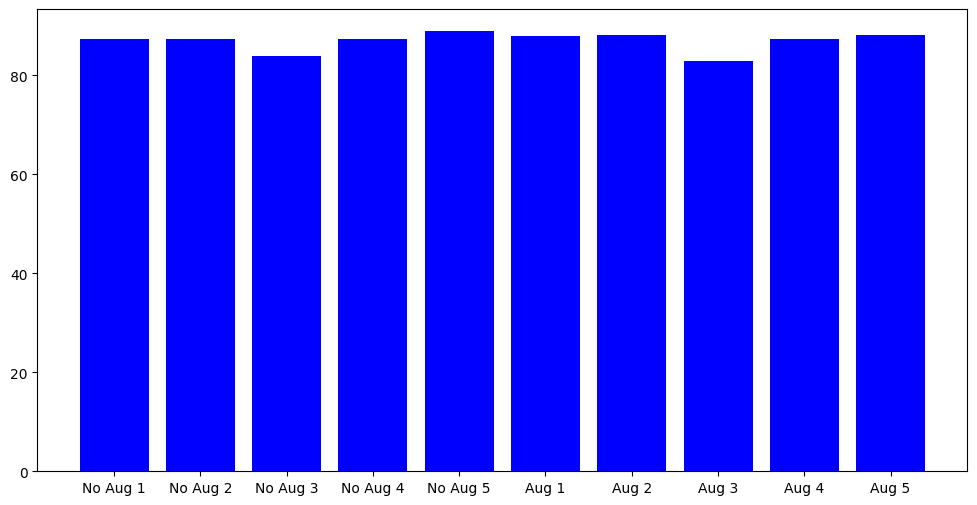

In [ ]:
# Plot the accuracy results of the experiments
plt.figure(figsize=(12, 6))  # Set figure size for better readability
# Create a bar chart showing the accuracy of each experiment
plt.bar(summary_df['Experiment'], summary_df['Accuracy'], color=['blue']*5)